# Relax Challenge

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")
sns.set()

In [2]:
#Load and view user info
u_df = pd.read_csv('takehome_users.csv', encoding = 'latin')
print(u_df.shape)
u_df.head()

(12000, 10)


,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [3]:
#Rename object_id as user_id
u_df.rename(columns = {'object_id': 'user_id'}, inplace=True)

#Convert last_session_creation_time
u_df['last_session_creation_time'] = pd.to_datetime(u_df['last_session_creation_time'],unit='s')
u_df.head()

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0


In [4]:
#Load and view user activity info
a_df = pd.read_csv('takehome_user_engagement.csv')
print(a_df.shape)
a_df.head()

(207917, 3)


,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [5]:
u_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
user_id                       12000 non-null int64
creation_time                 12000 non-null object
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    8823 non-null datetime64[ns]
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            6417 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(4), object(4)
memory usage: 937.6+ KB


In [6]:
a_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
time_stamp    207917 non-null object
user_id       207917 non-null int64
visited       207917 non-null int64
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [7]:
u_df.describe()

,user_id,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
count,12000.00000,12000.000000,12000.000000,12000.000000,6417.000000
mean,6000.50000,0.249500,0.149333,141.884583,5962.957145
std,3464.24595,0.432742,0.356432,124.056723,3383.761968
min,1.00000,0.000000,0.000000,0.000000,3.000000
25%,3000.75000,0.000000,0.000000,29.000000,3058.000000
50%,6000.50000,0.000000,0.000000,108.000000,5954.000000
75%,9000.25000,0.000000,0.000000,238.250000,8817.000000
max,12000.00000,1.000000,1.000000,416.000000,11999.000000


Of the signups only 25% opted in to mailing list and 15% ar on the regular marketing list.

In [8]:
#Merge the user 
df = pd.merge(u_df, a_df, on='user_id')
print(df.shape)
df.head()

(207917, 12)


,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,time_stamp,visited
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,2014-04-22 03:53:30,1
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,2013-11-15 03:45:04,1
2,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,2013-11-29 03:45:04,1
3,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,2013-12-09 03:45:04,1
4,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,2013-12-25 03:45:04,1


In [9]:
#Reindex df
df1 = df.set_index(['user_id', 'visited']).sort_index()
df1.head()

creation_time            name  \
user_id visited                                        
1       1        2014-04-22 03:53:30  Clausen August   
2       1        2013-11-15 03:45:04   Poole Matthew   
        1        2013-11-15 03:45:04   Poole Matthew   
        1        2013-11-15 03:45:04   Poole Matthew   
        1        2013-11-15 03:45:04   Poole Matthew   

                                    email creation_source  \
user_id visited                                             
1       1        AugustCClausen@yahoo.com    GUEST_INVITE   
2       1          MatthewPoole@gustr.com      ORG_INVITE   
        1          MatthewPoole@gustr.com      ORG_INVITE   
        1          MatthewPoole@gustr.com      ORG_INVITE   
        1          MatthewPoole@gustr.com      ORG_INVITE   

                last_session_creation_time  opted_in_to_mailing_list  \
user_id visited                                                        
1       1              2014-04-22 03:53:30                         1   
2       1              2014-03-31 03:45:04                         0   
        1              2014-03-31 03:45:04                         0   
        1              2014-03-31 03:45:04                         0   
        1              2014-03-31 03:45:04                         0   

                 enabled_for_marketing_drip  org_id  invited_by_user_id  \
user_id visited                                                           
1       1                                 0      11             10803.0   
2       1                                 0       1               316.0   
        1                                 0       1               316.0   
        1                                 0       1               316.0   
        1                                 0       1               316.0   

                          time_stamp  
user_id visited                       
1       1        2014-04-22 03:53:30  
2       1        2013-11-15 03:45:04  
        1        2013-11-29 03:45:04  
        1        2013-12-09 03:45:04  
        1        2013-12-25 03:45:04

In [10]:
# Number of organisation represented
print('There are', len(u_df['org_id'].unique()), 'organizations prepresented.')

There are 417 organizations prepresented.


In [11]:
#Convert to datetime
a_df['time_stamp'] = pd.to_datetime(a_df['time_stamp'])
print(a_df.info())

#Reindex
active_users = a_df.set_index(['user_id', 'time_stamp'])
active_users.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
time_stamp    207917 non-null datetime64[ns]
user_id       207917 non-null int64
visited       207917 non-null int64
dtypes: datetime64[ns](1), int64(2)
memory usage: 4.8 MB
None


visited
user_id time_stamp                  
1       2014-04-22 03:53:30        1
2       2013-11-15 03:45:04        1
        2013-11-29 03:45:04        1
        2013-12-09 03:45:04        1
        2013-12-25 03:45:04        1

In [12]:
def log_progress(sequence, every=None, size=None, name='Items'):
    from ipywidgets import IntProgress, HTML, VBox
    from IPython.display import display

    is_iterator = False
    if size is None:
        try:
            size = len(sequence)
        except TypeError:
            is_iterator = True
    if size is not None:
        if every is None:
            if size <= 200:
                every = 1
            else:
                every = int(size / 200)     # every 0.5%
    else:
        assert every is not None, 'sequence is iterator, set every'

    if is_iterator:
        progress = IntProgress(min=0, max=1, value=1)
        progress.bar_style = 'info'
    else:
        progress = IntProgress(min=0, max=size, value=0)
    label = HTML()
    box = VBox(children=[label, progress])
    display(box)

    index = 0
    try:
        for index, record in enumerate(sequence, 1):
            if index == 1 or index % every == 0:
                if is_iterator:
                    label.value = '{name}: {index} / ?'.format(
                        name=name,
                        index=index
                    )
                else:
                    progress.value = index
                    label.value = u'{name}: {index} / {size}'.format(
                        name=name,
                        index=index,
                        size=size
                    )
            yield record
    except:
        progress.bar_style = 'danger'
        raise
    else:
        progress.bar_style = 'success'
        progress.value = index
        label.value = "{name}: {index}".format(
            name=name,
            index=str(index or '?')
        )

In [13]:
# Create a list of users that were active at least 3 days in a 7 day period
regular_users = []

for idx, row in log_progress(active_users.groupby(level=0), every=1):
    a = (active_users.loc[idx].resample('W').count() > 2).sum()[0]
    if a > 0:
        regular_users.append(idx)
        

In [14]:
# Calculate the percent of adopted users
adopted_users = (len(regular_users)/len(active_users.groupby(level=0)))*100

print('The percent of adopted users is ' + str(round(adopted_users, 1)) +'%.')

The percent of adopted users is 16.4%.


In [15]:
#Create new column to identify adopted users
u_df['adopted'] = u_df['user_id'].map({i: True for i in regular_users})
u_df['adopted'].fillna(False, inplace=True)
u_df.head()

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,False
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,True
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,False
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,False
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,False


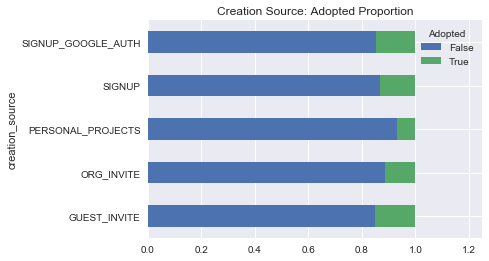

In [16]:
cre_s = u_df.groupby(['creation_source','adopted']).size().groupby(level=[0]).apply(lambda x: x / x.sum()).unstack()
cre_s.plot.barh(stacked=True, rot=0)
plt.title('Creation Source: Adopted Proportion')
plt.legend(title='Adopted')
plt.margins(0.25)
plt.show()

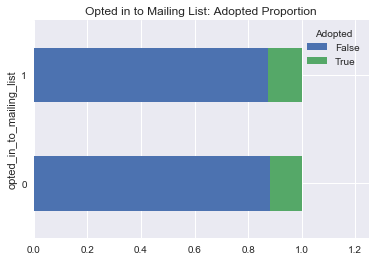

In [17]:
mail_opted = u_df.groupby(['opted_in_to_mailing_list','adopted']).size().groupby(level=[0]).apply(lambda x: x / x.sum()).unstack()
mail_opted.plot.barh(stacked=True, rot=0)
plt.title('Opted in to Mailing List: Adopted Proportion')
plt.legend(title='Adopted')
plt.margins(0.25)
plt.show()

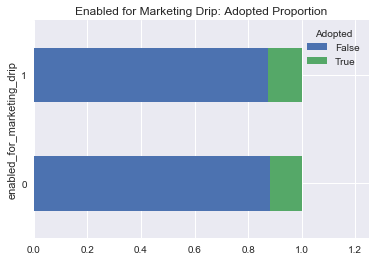

In [18]:
marketing = u_df.groupby(['enabled_for_marketing_drip','adopted']).size().groupby(level=[0]).apply(lambda x: x / x.sum()).unstack()
marketing.plot.barh(stacked=True, rot=0)
plt.title('Enabled for Marketing Drip: Adopted Proportion')
plt.legend(title='Adopted')
plt.margins(0.25)
plt.show()

Creation source seems to the best method for predicting is a user would be categorized as adotped. Organizationally invites seems to directly influnce user activity.

In [19]:
avg_use = df[['user_id', 'visited']].groupby(['user_id']).agg(['count']).mean()[0]
print('Users average login is', round(avg_use, 1))

Users average login is 23.6
